In [1]:
import pandas as pd

# Load the dataset
file_path = '/home/dataroland/INNIO/engine_adj.csv'
df = pd.read_csv(file_path)

In [2]:
from pycaret.classification import *

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import arange

In [27]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (273, 12)
Unseen Data For Predictions: (30, 12)


In [28]:
#training_df = df.sample(frac=0.7)
#test_df = df.drop(training_df.index)

In [29]:
pycaret_run_base = setup(data = data, target = 'high_breakdown_risk', session_id=123) 

,Description,Value
0,Session id,123
1,Target,high_breakdown_risk
2,Target type,Binary
3,Original data shape,"(273, 12)"
4,Transformed data shape,"(273, 15)"
5,Transformed train set shape,"(191, 15)"
6,Transformed test set shape,"(82, 15)"
7,Numeric features,7
8,Categorical features,1
9,Preprocess,True


In [30]:
best_base = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.7850,0.8610,0.7964,0.8262,0.8043,0.5675,0.5794,0.3130
rf,Random Forest Classifier,0.7847,0.8515,0.8236,0.8164,0.8127,0.5618,0.5738,0.4820
ridge,Ridge Classifier,0.7742,0.0000,0.8327,0.7939,0.8060,0.5384,0.5545,0.1260
gbc,Gradient Boosting Classifier,0.7689,0.8473,0.8036,0.8003,0.7954,0.5297,0.5395,0.2700
lda,Linear Discriminant Analysis,0.7689,0.8494,0.8227,0.7915,0.8010,0.5279,0.5391,0.0930
et,Extra Trees Classifier,0.7589,0.8209,0.7773,0.8014,0.7822,0.5147,0.5244,0.3550
lightgbm,Light Gradient Boosting Machine,0.7587,0.8595,0.8055,0.7941,0.7873,0.5117,0.5316,0.1240
lr,Logistic Regression,0.7487,0.8487,0.8064,0.7703,0.7805,0.4875,0.5028,0.1400
ada,Ada Boost Classifier,0.7266,0.7808,0.7845,0.7454,0.7593,0.4440,0.4514,0.3890
dt,Decision Tree Classifier,0.6800,0.6761,0.7091,0.7253,0.7097,0.3500,0.3570,0.2090


In [31]:
evaluate_model(best_base)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
# Naive Bayes

In [32]:
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8500,0.9192,0.7273,1.0000,0.8421,0.7059,0.7385
1,0.8421,0.8889,0.9000,0.8182,0.8571,0.6816,0.6854
2,0.7895,0.9111,0.9000,0.7500,0.8182,0.5730,0.5866
3,0.6842,0.8778,0.8000,0.6667,0.7273,0.3596,0.3680
4,0.8947,0.9444,1.0000,0.8333,0.9091,0.7865,0.8051
5,0.7895,0.7841,0.7273,0.8889,0.8000,0.5824,0.5955
6,0.6842,0.7159,0.7273,0.7273,0.7273,0.3523,0.3523
7,0.6842,0.8068,0.6364,0.7778,0.7000,0.3736,0.3820
8,0.8947,0.9205,0.8182,1.0000,0.9000,0.7912,0.8090


In [33]:
tuned_nb = tune_model(nb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.9293,0.7273,0.8889,0.8000,0.6040,0.6162
1,0.7895,0.9000,0.9000,0.7500,0.8182,0.5730,0.5866
2,0.7895,0.9444,0.9000,0.7500,0.8182,0.5730,0.5866
3,0.7368,0.8778,0.9000,0.6923,0.7826,0.4633,0.4893
4,0.8947,0.9444,1.0000,0.8333,0.9091,0.7865,0.8051
5,0.7895,0.7614,0.7273,0.8889,0.8000,0.5824,0.5955
6,0.6316,0.7386,0.6364,0.7000,0.6667,0.2570,0.2584
7,0.7895,0.8068,0.8182,0.8182,0.8182,0.5682,0.5682
8,0.8421,0.9318,0.8182,0.9000,0.8571,0.6816,0.6854


Fitting 10 folds for each of 10 candidates, totalling 100 fits


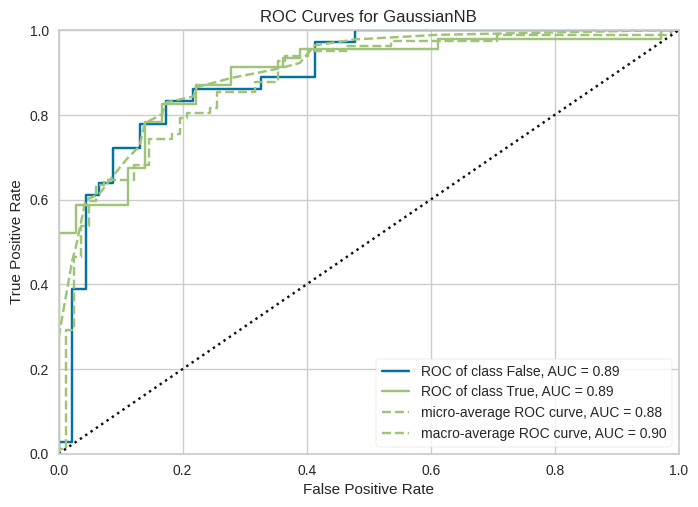

In [34]:
plot_model(tuned_nb, plot = 'auc')

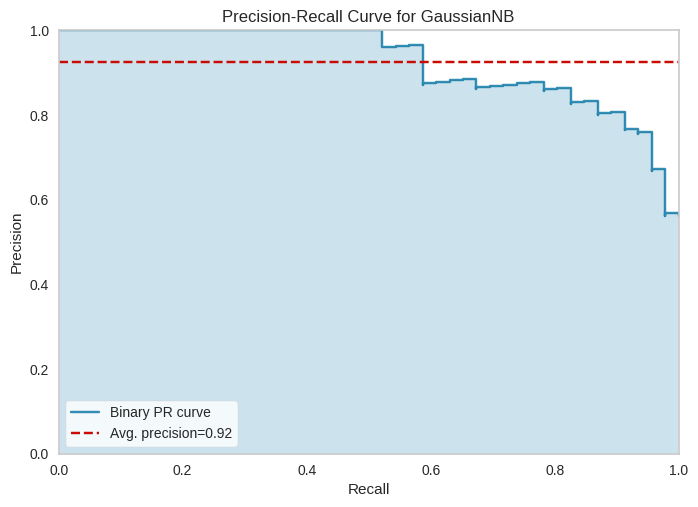

In [35]:
plot_model(tuned_nb, plot = 'pr')

In [36]:
plot_model(tuned_nb, plot='feature')

TypeError: Feature Importance and RFE plots not available for estimators that doesnt support coef_ or feature_importances_ attribute.

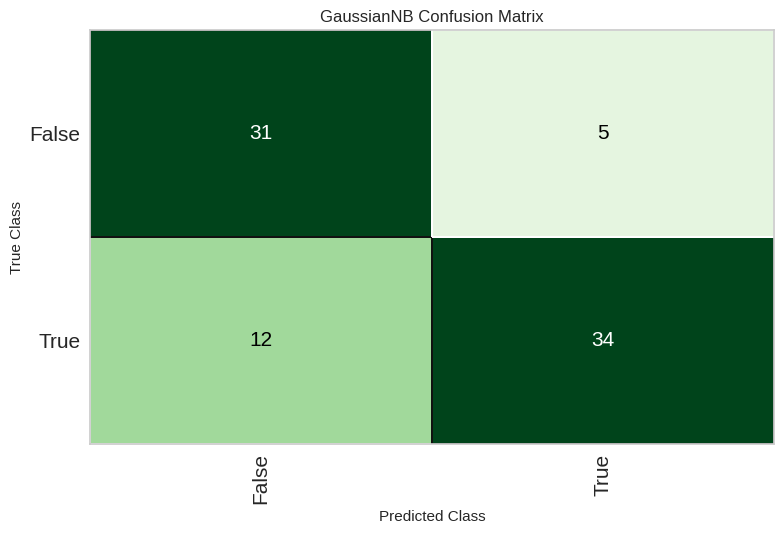

In [37]:
plot_model(tuned_nb, plot = 'confusion_matrix')

In [38]:
predict_model(tuned_nb);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.7927,0.8937,0.7391,0.8718,0.8000,0.5878,0.5965


In [39]:
final_nb = finalize_model(tuned_nb)

In [40]:
predict_model(final_nb);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.8293,0.9040,0.8043,0.8810,0.8409,0.6575,0.6607


In [41]:
unseen_predictions = predict_model(final_nb, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.7000,0.8597,0.8462,0.6111,0.7097,0.4156,0.4394


,oph,pist_m,issue_type,bmep,ng_imp,past_dmg,resting_analysis_results,rpm_max,full_load_issues,number_up,number_tc,high_breakdown_risk,prediction_label,prediction_score
5,57000,True,typical,140.0,384.0,False,1.0,1480.0,False,4,1,True,0,0.5855
20,59000,True,typical,135.0,468.0,False,1.0,1610.0,False,5,1,True,0,0.5226
46,44000,True,non-related,140.0,470.0,False,0.0,1800.0,False,0,2,True,1,0.9904
48,53000,False,non-related,128.0,432.0,False,0.0,1150.0,False,0,2,True,1,0.8995
52,62000,True,non-related,130.0,462.0,False,1.0,1460.0,False,18,1,True,1,0.6359


In [42]:
save_model(final_nb,'Final NB Model engine')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['oph', 'bmep', 'ng_imp',
                                              'resting_analysis_results',
                                              'rpm_max', 'number_up',
                                              'number_tc'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                

In [ ]:
# Random Forest

In [43]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9000,0.9394,0.8182,1.0000,0.9000,0.8020,0.8182
1,0.6316,0.7167,0.9000,0.6000,0.7200,0.2400,0.2858
2,0.8421,0.9167,0.9000,0.8182,0.8571,0.6816,0.6854
3,0.7895,0.8722,0.9000,0.7500,0.8182,0.5730,0.5866
4,0.8947,0.9222,0.9000,0.9000,0.9000,0.7889,0.7889
5,0.7368,0.8182,0.8182,0.7500,0.7826,0.4509,0.4536
6,0.6842,0.7557,0.7273,0.7273,0.7273,0.3523,0.3523
7,0.7368,0.7898,0.7273,0.8000,0.7619,0.4693,0.4719
8,0.8421,0.9375,0.7273,1.0000,0.8421,0.6919,0.7273


In [44]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.9495,0.7273,0.8889,0.8000,0.6040,0.6162
1,0.7368,0.8333,0.9000,0.6923,0.7826,0.4633,0.4893
2,0.7895,0.9111,0.8000,0.8000,0.8000,0.5778,0.5778
3,0.7895,0.8556,0.7000,0.8750,0.7778,0.5824,0.5955
4,0.9474,0.9556,1.0000,0.9091,0.9524,0.8939,0.8989
5,0.7895,0.8295,0.8182,0.8182,0.8182,0.5682,0.5682
6,0.7368,0.7159,0.8182,0.7500,0.7826,0.4509,0.4536
7,0.7368,0.7841,0.7273,0.8000,0.7619,0.4693,0.4719
8,0.8421,0.9091,0.7273,1.0000,0.8421,0.6919,0.7273


Fitting 10 folds for each of 10 candidates, totalling 100 fits


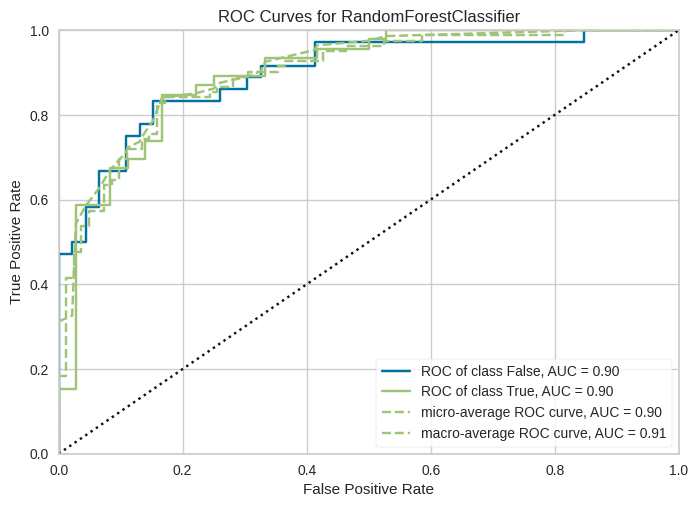

In [45]:
plot_model(tuned_rf, plot = 'auc')

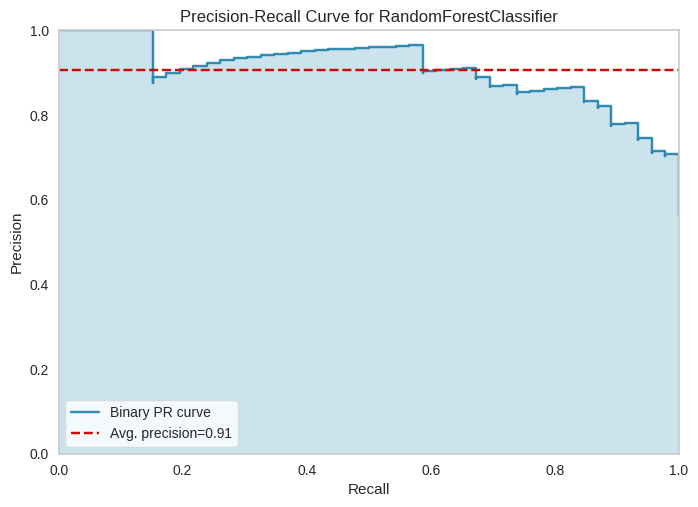

In [46]:
plot_model(tuned_rf, plot = 'pr')

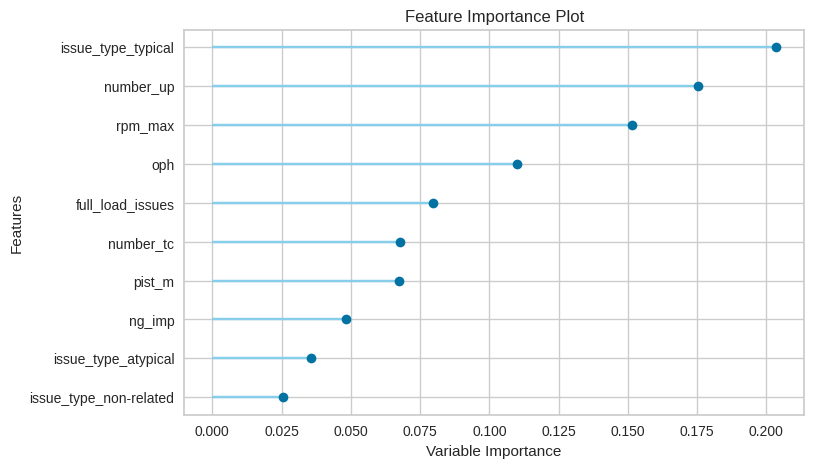

In [47]:
plot_model(tuned_rf, plot='feature')

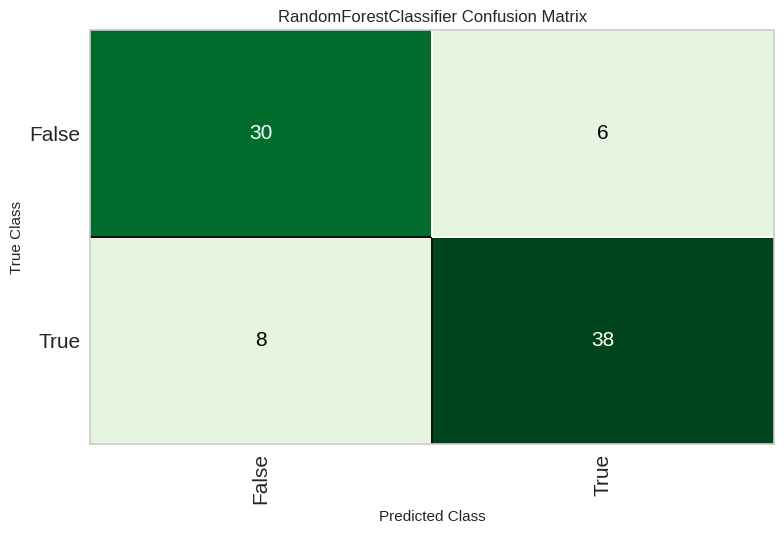

In [48]:
plot_model(tuned_rf, plot = 'confusion_matrix')

In [49]:
predict_model(tuned_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8293,0.8979,0.8261,0.8636,0.8444,0.6555,0.6563


In [50]:
final_rf = finalize_model(tuned_rf)

In [51]:
predict_model(final_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8780,0.9686,0.8696,0.9091,0.8889,0.7539,0.7548


In [52]:
unseen_predictions = predict_model(final_rf, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7000,0.8688,0.6923,0.6429,0.6667,0.3946,0.3955


,oph,pist_m,issue_type,bmep,ng_imp,past_dmg,resting_analysis_results,rpm_max,full_load_issues,number_up,number_tc,high_breakdown_risk,prediction_label,prediction_score
5,57000,True,typical,140.0,384.0,False,1.0,1480.0,False,4,1,True,0,0.5537
20,59000,True,typical,135.0,468.0,False,1.0,1610.0,False,5,1,True,0,0.5650
46,44000,True,non-related,140.0,470.0,False,0.0,1800.0,False,0,2,True,1,0.8372
48,53000,False,non-related,128.0,432.0,False,0.0,1150.0,False,0,2,True,1,0.8695
52,62000,True,non-related,130.0,462.0,False,1.0,1460.0,False,18,1,True,0,0.6145


In [54]:
save_model(final_rf,'Final RF Model engine')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['oph', 'bmep', 'ng_imp',
                                              'resting_analysis_results',
                                              'rpm_max', 'number_up',
                                              'number_tc'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                

In [33]:
# Gradient Boosting Classifier

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9000,0.9697,0.9091,0.9091,0.9091,0.7980,0.7980
1,0.6842,0.7000,0.8000,0.6667,0.7273,0.3596,0.3680
2,0.7895,0.8778,0.8000,0.8000,0.8000,0.5778,0.5778
3,0.7895,0.8556,0.9000,0.7500,0.8182,0.5730,0.5866
4,0.8421,0.9111,0.9000,0.8182,0.8571,0.6816,0.6854
5,0.6842,0.8068,0.8182,0.6923,0.7500,0.3294,0.3380
6,0.6316,0.6705,0.7273,0.6667,0.6957,0.2312,0.2326
7,0.7368,0.8636,0.7273,0.8000,0.7619,0.4693,0.4719
8,0.7895,0.9432,0.6364,1.0000,0.7778,0.5957,0.6513


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8500,0.9596,0.8182,0.9000,0.8571,0.7000,0.7035
1,0.6842,0.8000,0.9000,0.6429,0.7500,0.3523,0.3906
2,0.7895,0.9222,0.9000,0.7500,0.8182,0.5730,0.5866
3,0.8421,0.9333,1.0000,0.7692,0.8696,0.6780,0.7161
4,0.9474,0.9444,1.0000,0.9091,0.9524,0.8939,0.8989
5,0.6316,0.8295,0.8182,0.6429,0.7200,0.2036,0.2166
6,0.7368,0.7386,0.8182,0.7500,0.7826,0.4509,0.4536
7,0.7368,0.8068,0.7273,0.8000,0.7619,0.4693,0.4719
8,0.8421,0.9318,0.8182,0.9000,0.8571,0.6816,0.6854


Fitting 10 folds for each of 10 candidates, totalling 100 fits


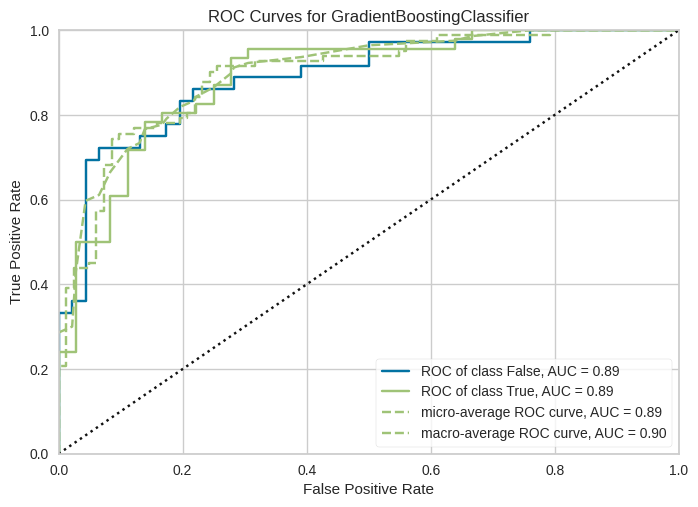

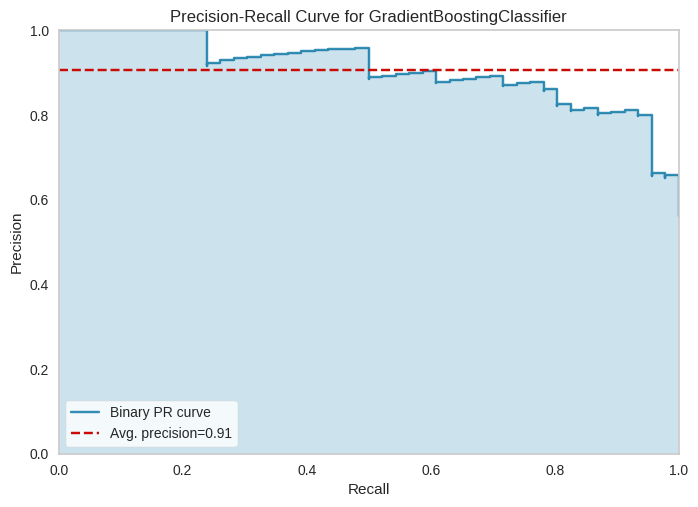

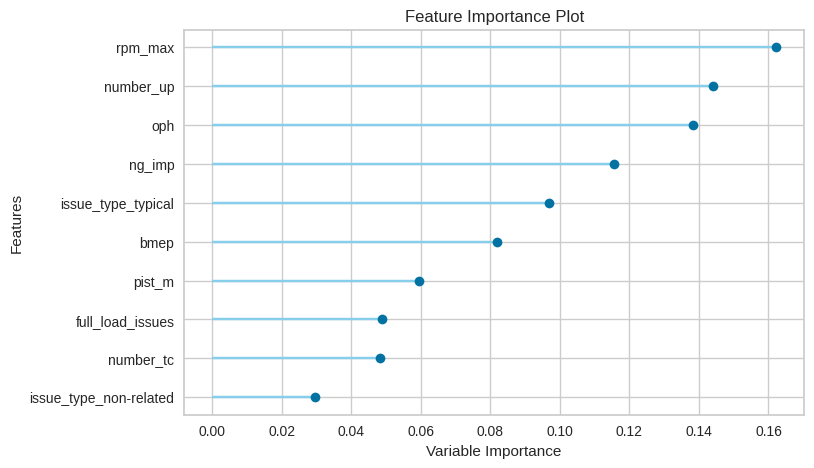

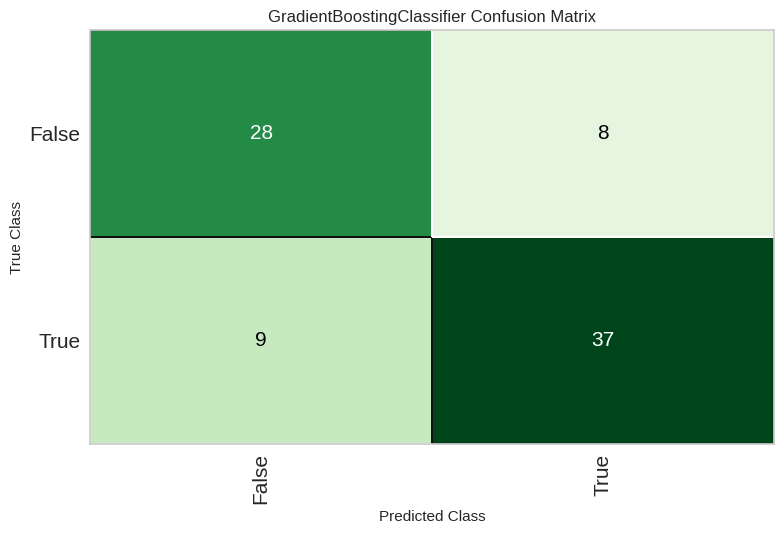

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7927,0.8901,0.8043,0.8222,0.8132,0.5804,0.5806


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9390,0.9921,0.9565,0.9362,0.9462,0.8758,0.8761


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7000,0.8824,0.7692,0.6250,0.6897,0.4053,0.4135


,oph,pist_m,issue_type,bmep,ng_imp,past_dmg,resting_analysis_results,rpm_max,full_load_issues,number_up,number_tc,high_breakdown_risk,prediction_label,prediction_score
5,57000,True,typical,140.0,384.0,False,1.0,1480.0,False,4,1,True,1,0.5632
20,59000,True,typical,135.0,468.0,False,1.0,1610.0,False,5,1,True,0,0.5117
46,44000,True,non-related,140.0,470.0,False,0.0,1800.0,False,0,2,True,1,0.8363
48,53000,False,non-related,128.0,432.0,False,0.0,1150.0,False,0,2,True,1,0.8207
52,62000,True,non-related,130.0,462.0,False,1.0,1460.0,False,18,1,True,0,0.6554


In [55]:
gbc = create_model('gbc')
tuned_gbc = tune_model(gbc)
plot_model(tuned_gbc, plot = 'auc')
plot_model(tuned_gbc, plot = 'pr')
plot_model(tuned_gbc, plot='feature')
plot_model(tuned_gbc, plot = 'confusion_matrix')
predict_model(tuned_gbc);
final_gbc = finalize_model(tuned_gbc)
predict_model(final_gbc);
unseen_predictions = predict_model(final_gbc, data=data_unseen)
unseen_predictions.head()

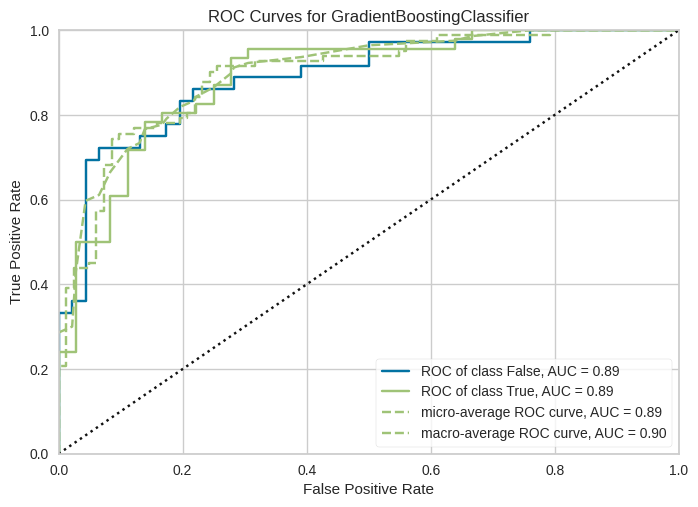

In [57]:
plot_model(tuned_gbc, plot = 'auc')

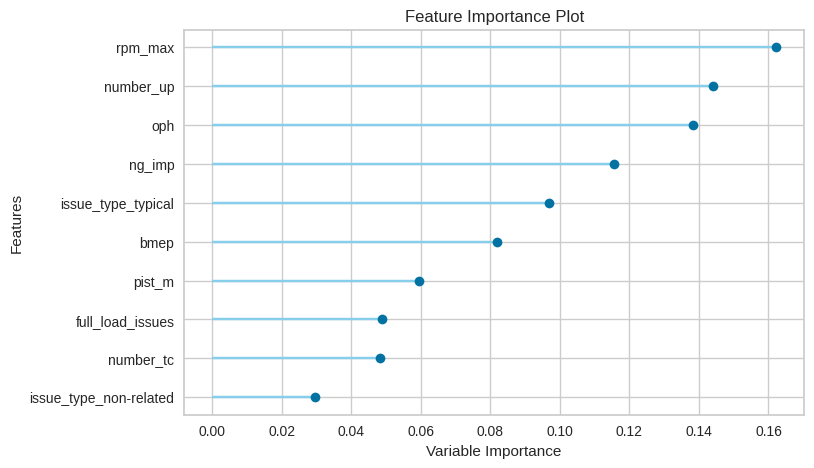

In [58]:
plot_model(tuned_gbc, plot='feature')

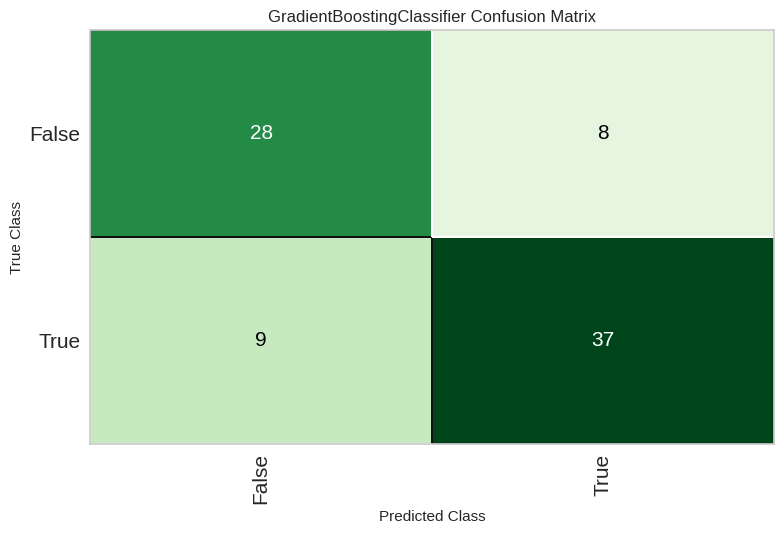

In [59]:
plot_model(tuned_gbc, plot = 'confusion_matrix')

In [56]:
save_model(final_gbc,'Final GBC Model engine')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['oph', 'bmep', 'ng_imp',
                                              'resting_analysis_results',
                                              'rpm_max', 'number_up',
                                              'number_tc'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                

In [ ]:
# ridge classifier

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9000,0.0000,0.8182,1.0000,0.9000,0.8020,0.8182
1,0.7368,0.0000,0.9000,0.6923,0.7826,0.4633,0.4893
2,0.7368,0.0000,0.8000,0.7273,0.7619,0.4693,0.4719
3,0.7368,0.0000,1.0000,0.6667,0.8000,0.4571,0.5443
4,0.8421,0.0000,0.9000,0.8182,0.8571,0.6816,0.6854
5,0.7895,0.0000,0.8182,0.8182,0.8182,0.5682,0.5682
6,0.6316,0.0000,0.7273,0.6667,0.6957,0.2312,0.2326
7,0.7368,0.0000,0.7273,0.8000,0.7619,0.4693,0.4719
8,0.8947,0.0000,0.8182,1.0000,0.9000,0.7912,0.8090


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9000,0.0000,0.8182,1.0000,0.9000,0.8020,0.8182
1,0.7368,0.0000,0.9000,0.6923,0.7826,0.4633,0.4893
2,0.7895,0.0000,0.9000,0.7500,0.8182,0.5730,0.5866
3,0.7368,0.0000,1.0000,0.6667,0.8000,0.4571,0.5443
4,0.8421,0.0000,0.9000,0.8182,0.8571,0.6816,0.6854
5,0.7368,0.0000,0.8182,0.7500,0.7826,0.4509,0.4536
6,0.6316,0.0000,0.7273,0.6667,0.6957,0.2312,0.2326
7,0.7368,0.0000,0.7273,0.8000,0.7619,0.4693,0.4719
8,0.9474,0.0000,0.9091,1.0000,0.9524,0.8939,0.8989


Fitting 10 folds for each of 10 candidates, totalling 100 fits


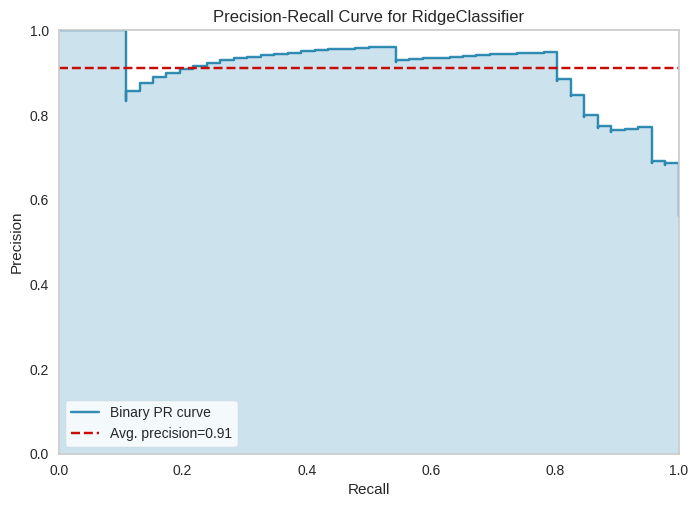

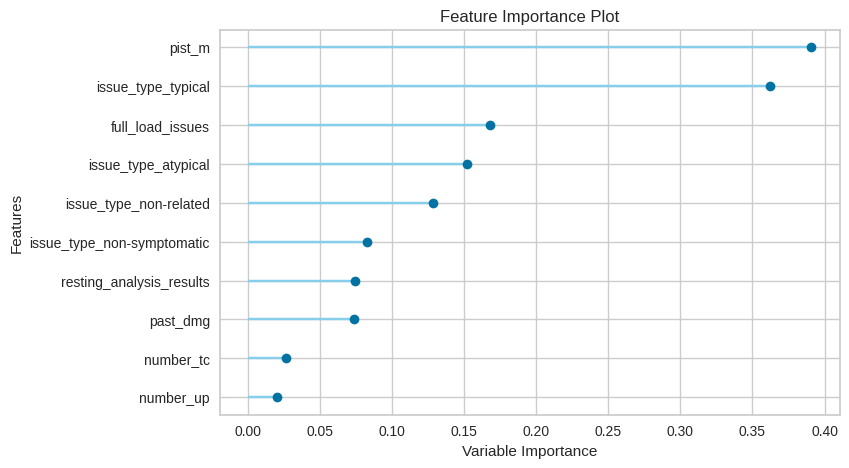

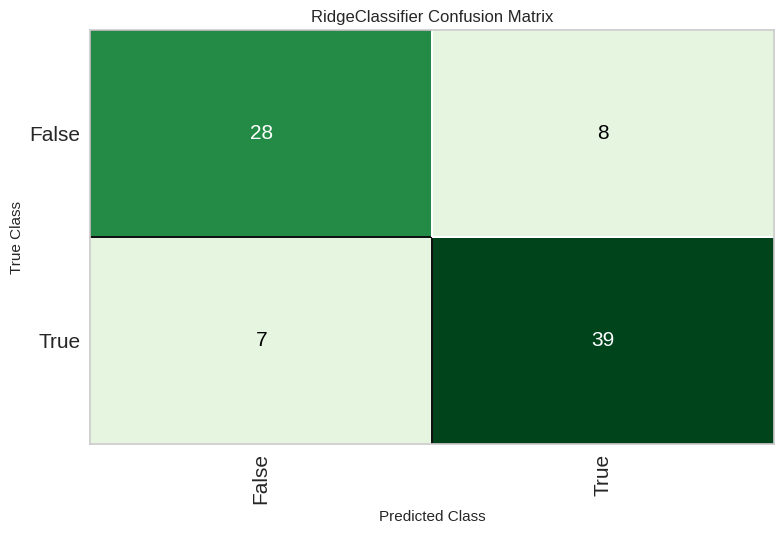

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.8171,0.8128,0.8478,0.8298,0.8387,0.6275,0.6277


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.8537,0.8454,0.9130,0.8400,0.8750,0.6993,0.7028


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.7667,0.7760,0.8462,0.6875,0.7586,0.5374,0.5483


,oph,pist_m,issue_type,bmep,ng_imp,past_dmg,resting_analysis_results,rpm_max,full_load_issues,number_up,number_tc,high_breakdown_risk,prediction_label
5,57000,True,typical,140.0,384.0,False,1.0,1480.0,False,4,1,True,0
20,59000,True,typical,135.0,468.0,False,1.0,1610.0,False,5,1,True,0
46,44000,True,non-related,140.0,470.0,False,0.0,1800.0,False,0,2,True,1
48,53000,False,non-related,128.0,432.0,False,0.0,1150.0,False,0,2,True,1
52,62000,True,non-related,130.0,462.0,False,1.0,1460.0,False,18,1,True,1


In [60]:
ridge = create_model('ridge')
tuned_ridge = tune_model(ridge)
# plot_model(tuned_ridge, plot = 'auc')
plot_model(tuned_ridge, plot = 'pr')
plot_model(tuned_ridge, plot='feature')
plot_model(tuned_ridge, plot = 'confusion_matrix')
predict_model(tuned_ridge);
final_ridge = finalize_model(tuned_ridge)
predict_model(final_ridge);
unseen_predictions = predict_model(final_ridge, data=data_unseen)
unseen_predictions.head()

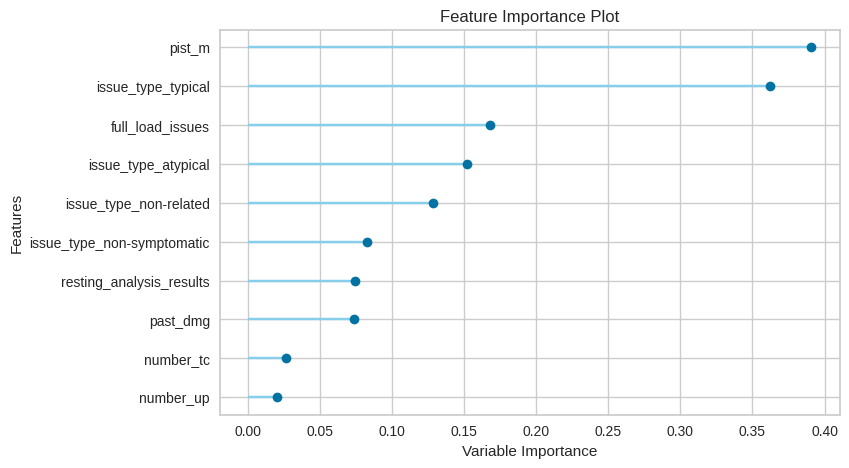

In [61]:
plot_model(tuned_ridge, plot='feature')


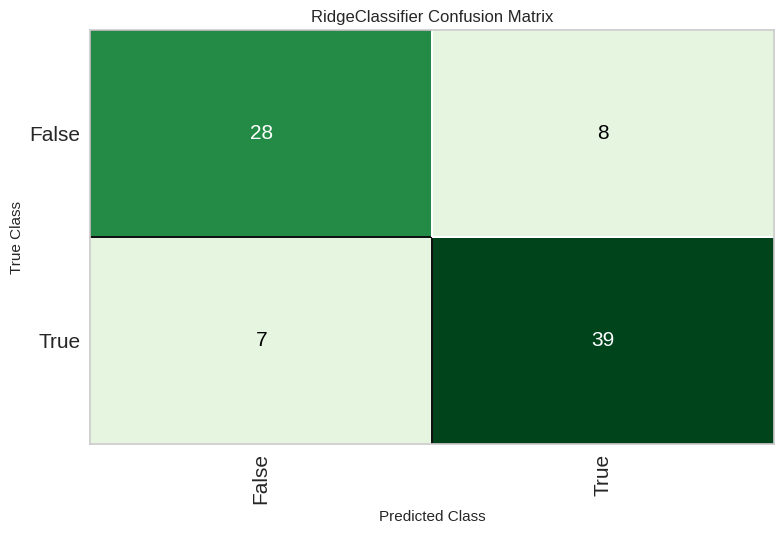

In [62]:
plot_model(tuned_ridge, plot = 'confusion_matrix')

In [63]:
save_model(final_ridge,'Final ridge Model engine')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['oph', 'bmep', 'ng_imp',
                                              'resting_analysis_results',
                                              'rpm_max', 'number_up',
                                              'number_tc'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                

In [39]:
# Light Gradient Boosting Machine

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8500,0.9495,0.9091,0.8333,0.8696,0.6939,0.6975
1,0.7368,0.9111,0.9000,0.6923,0.7826,0.4633,0.4893
2,0.7368,0.8889,0.8000,0.7273,0.7619,0.4693,0.4719
3,0.6316,0.8889,0.9000,0.6000,0.7200,0.2400,0.2858
4,0.8947,0.9222,1.0000,0.8333,0.9091,0.7865,0.8051
5,0.7895,0.7955,0.6364,1.0000,0.7778,0.5957,0.6513
6,0.6842,0.6705,0.7273,0.7273,0.7273,0.3523,0.3523
7,0.6842,0.8182,0.6364,0.7778,0.7000,0.3736,0.3820
8,0.8421,0.9091,0.7273,1.0000,0.8421,0.6919,0.7273


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8500,0.9293,0.8182,0.9000,0.8571,0.7000,0.7035
1,0.6316,0.8889,0.9000,0.6000,0.7200,0.2400,0.2858
2,0.8421,0.9111,0.9000,0.8182,0.8571,0.6816,0.6854
3,0.6842,0.8556,0.9000,0.6429,0.7500,0.3523,0.3906
4,0.9474,0.9556,1.0000,0.9091,0.9524,0.8939,0.8989
5,0.6842,0.8068,0.8182,0.6923,0.7500,0.3294,0.3380
6,0.6842,0.7614,0.9091,0.6667,0.7692,0.3049,0.3441
7,0.7368,0.8182,0.7273,0.8000,0.7619,0.4693,0.4719
8,0.8421,0.8977,0.8182,0.9000,0.8571,0.6816,0.6854


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Info] Num

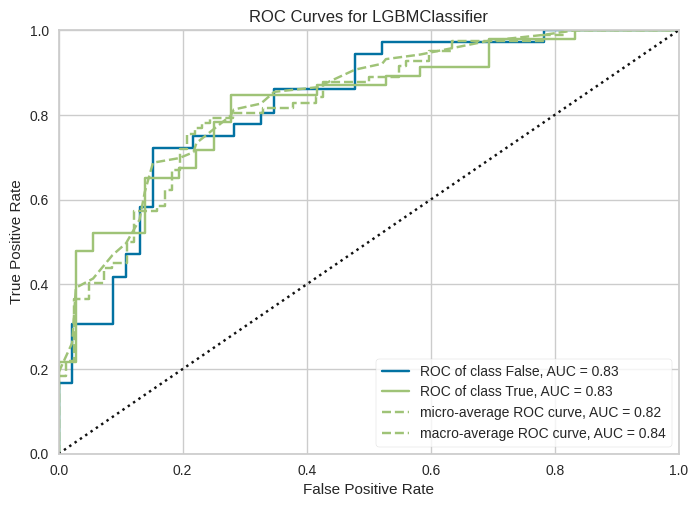

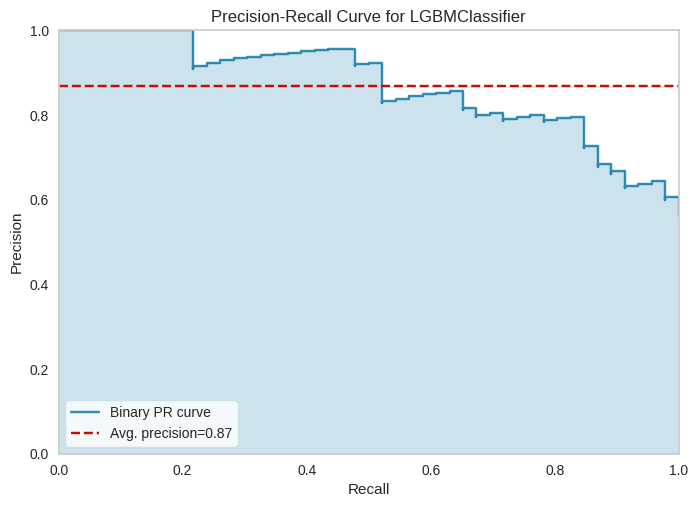

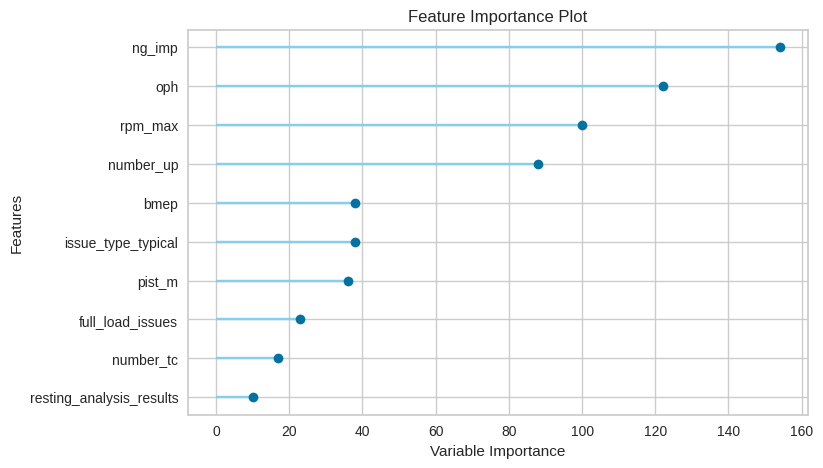

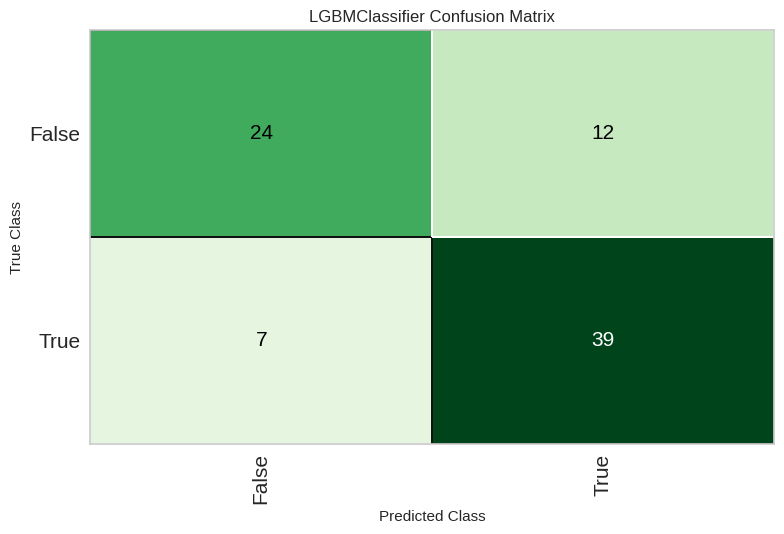

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7683,0.8273,0.8478,0.7647,0.8041,0.5224,0.5266


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7000,0.7783,0.7692,0.6250,0.6897,0.4053,0.4135


,oph,pist_m,issue_type,bmep,ng_imp,past_dmg,resting_analysis_results,rpm_max,full_load_issues,number_up,number_tc,high_breakdown_risk,prediction_label,prediction_score
5,57000,True,typical,140.0,384.0,False,1.0,1480.0,False,4,1,True,1,0.6015
20,59000,True,typical,135.0,468.0,False,1.0,1610.0,False,5,1,True,0,0.6131
46,44000,True,non-related,140.0,470.0,False,0.0,1800.0,False,0,2,True,1,0.9840
48,53000,False,non-related,128.0,432.0,False,0.0,1150.0,False,0,2,True,1,0.9862
52,62000,True,non-related,130.0,462.0,False,1.0,1460.0,False,18,1,True,0,0.9264


In [64]:
lightgbm = create_model('lightgbm')
tuned_lightgbm = tune_model(lightgbm)
plot_model(tuned_lightgbm, plot = 'auc')
plot_model(tuned_lightgbm, plot = 'pr')
plot_model(tuned_lightgbm, plot='feature')
plot_model(tuned_lightgbm, plot = 'confusion_matrix')
predict_model(tuned_lightgbm);
final_lightgbm = finalize_model(tuned_lightgbm)
predict_model(final_lightgbm);
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

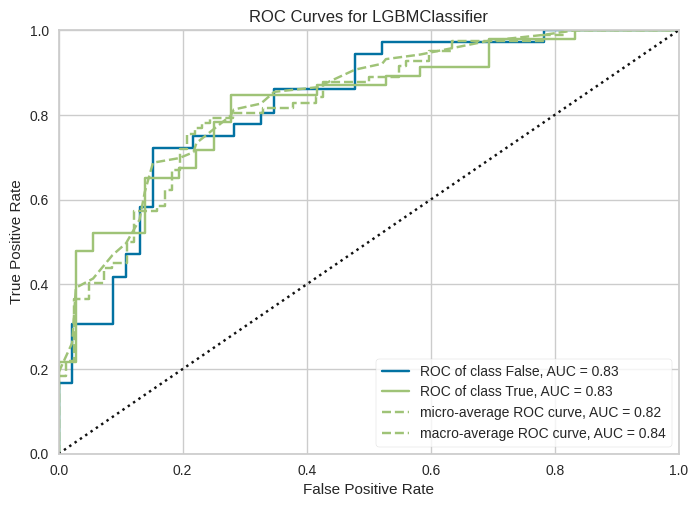

In [65]:
plot_model(tuned_lightgbm, plot = 'auc')

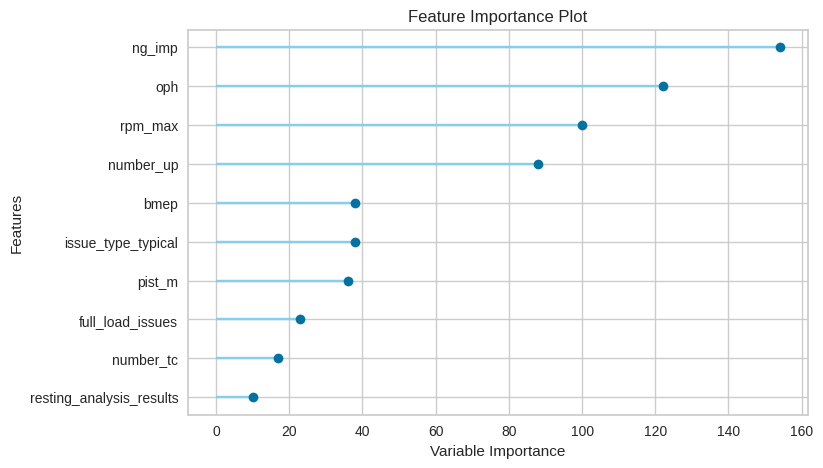

In [66]:
plot_model(tuned_lightgbm, plot='feature')

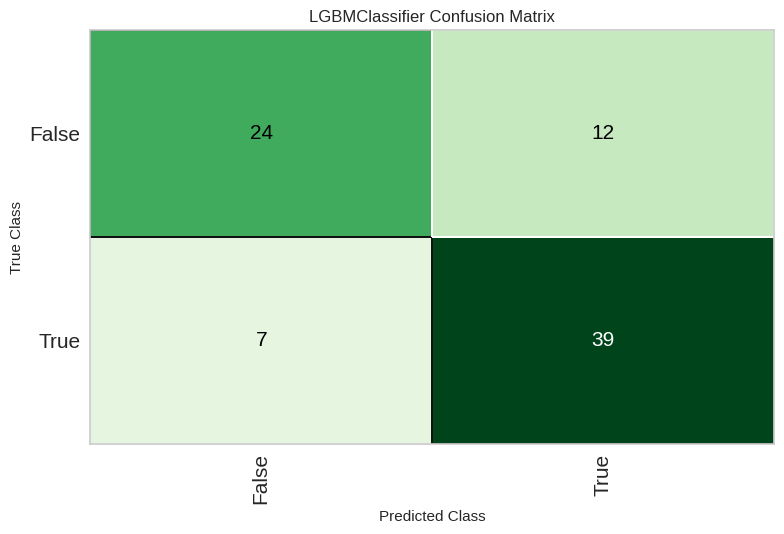

In [67]:
plot_model(tuned_lightgbm, plot = 'confusion_matrix')

In [68]:
save_model(final_lightgbm,'Final lightgbm Model engine')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['oph', 'bmep', 'ng_imp',
                                              'resting_analysis_results',
                                              'rpm_max', 'number_up',
                                              'number_tc'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                

In [42]:
# 	Logistic Regression

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7500,0.8990,0.6364,0.8750,0.7368,0.5098,0.5334
1,0.7368,0.9111,0.9000,0.6923,0.7826,0.4633,0.4893
2,0.7895,0.9222,0.9000,0.7500,0.8182,0.5730,0.5866
3,0.7895,0.8556,1.0000,0.7143,0.8333,0.5682,0.6299
4,0.8421,0.9556,0.9000,0.8182,0.8571,0.6816,0.6854
5,0.5789,0.6818,0.6364,0.6364,0.6364,0.1364,0.1364
6,0.6316,0.7159,0.7273,0.6667,0.6957,0.2312,0.2326
7,0.7368,0.8068,0.7273,0.8000,0.7619,0.4693,0.4719
8,0.8947,0.9205,0.8182,1.0000,0.9000,0.7912,0.8090


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9000,0.9697,0.8182,1.0000,0.9000,0.8020,0.8182
1,0.6316,0.6889,0.7000,0.6364,0.6667,0.2570,0.2584
2,0.7895,0.9111,0.9000,0.7500,0.8182,0.5730,0.5866
3,0.7368,0.8667,0.9000,0.6923,0.7826,0.4633,0.4893
4,0.9474,0.9222,1.0000,0.9091,0.9524,0.8939,0.8989
5,0.7368,0.7841,0.8182,0.7500,0.7826,0.4509,0.4536
6,0.6842,0.5568,0.7273,0.7273,0.7273,0.3523,0.3523
7,0.7895,0.7841,0.8182,0.8182,0.8182,0.5682,0.5682
8,0.8421,0.9205,0.9091,0.8333,0.8696,0.6705,0.6746


Fitting 10 folds for each of 10 candidates, totalling 100 fits


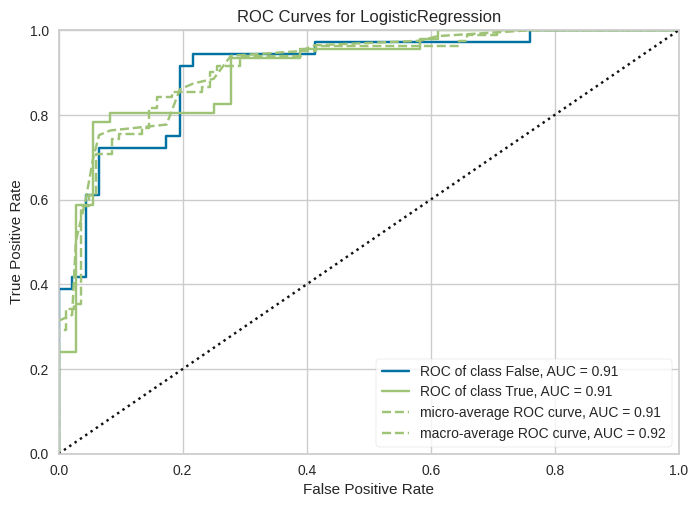

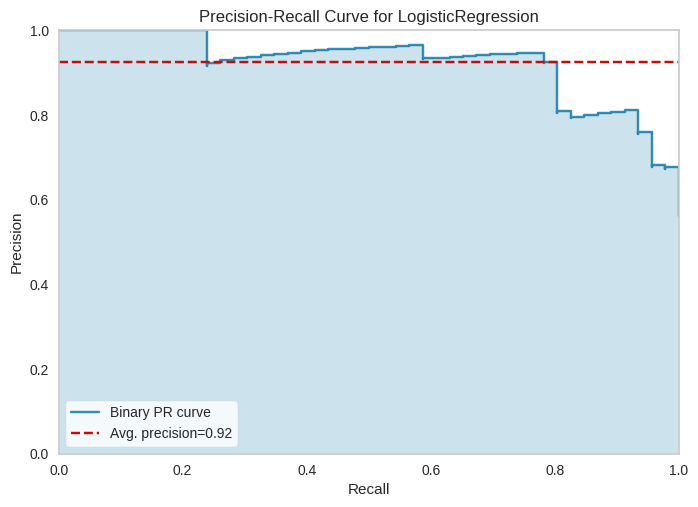

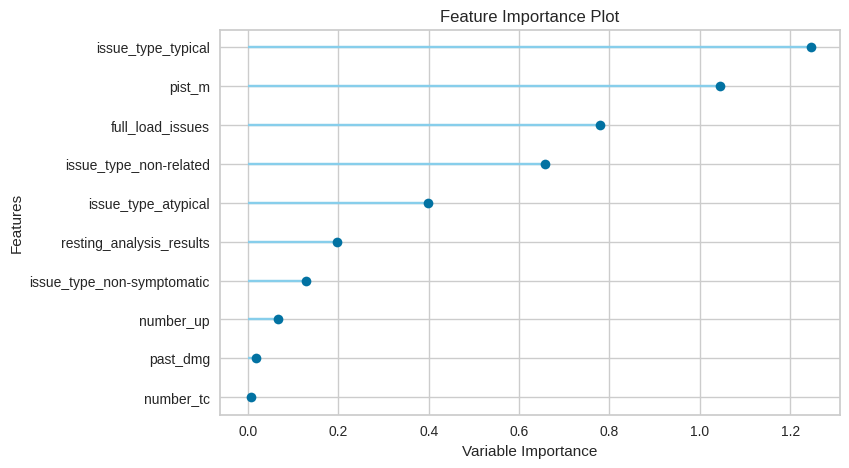

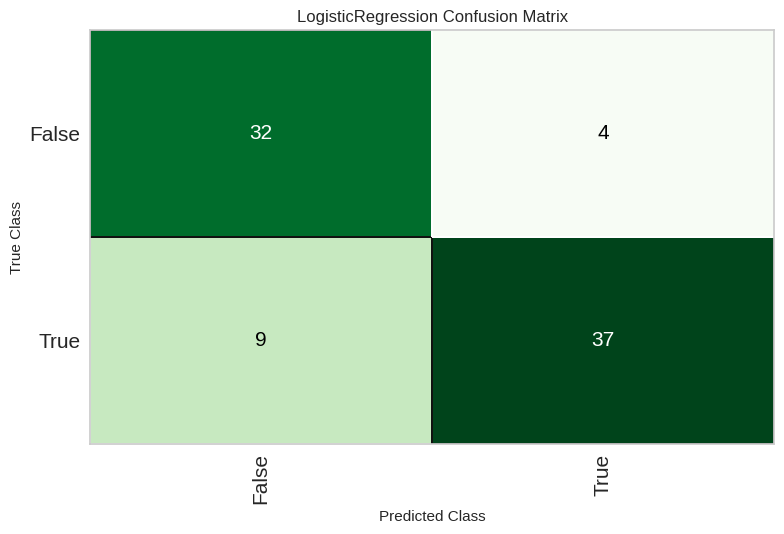

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8415,0.9076,0.8043,0.9024,0.8506,0.6829,0.6881


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.6951,0.7591,0.7391,0.7234,0.7312,0.3792,0.3793


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7000,0.8869,0.9231,0.6000,0.7273,0.4255,0.4757


,oph,pist_m,issue_type,bmep,ng_imp,past_dmg,resting_analysis_results,rpm_max,full_load_issues,number_up,number_tc,high_breakdown_risk,prediction_label,prediction_score
5,57000,True,typical,140.0,384.0,False,1.0,1480.0,False,4,1,True,1,0.6851
20,59000,True,typical,135.0,468.0,False,1.0,1610.0,False,5,1,True,1,0.7218
46,44000,True,non-related,140.0,470.0,False,0.0,1800.0,False,0,2,True,1,0.8741
48,53000,False,non-related,128.0,432.0,False,0.0,1150.0,False,0,2,True,1,0.5567
52,62000,True,non-related,130.0,462.0,False,1.0,1460.0,False,18,1,True,0,0.5909


In [70]:
lr = create_model('lr')
tuned_lr = tune_model(lr)
plot_model(tuned_lr, plot = 'auc')
plot_model(tuned_lr, plot = 'pr')
plot_model(tuned_lr, plot='feature')
plot_model(tuned_lr, plot = 'confusion_matrix')
predict_model(tuned_lr);
final_lr = finalize_model(tuned_lr)
predict_model(final_lr);
unseen_predictions = predict_model(final_lr, data=data_unseen)
unseen_predictions.head()

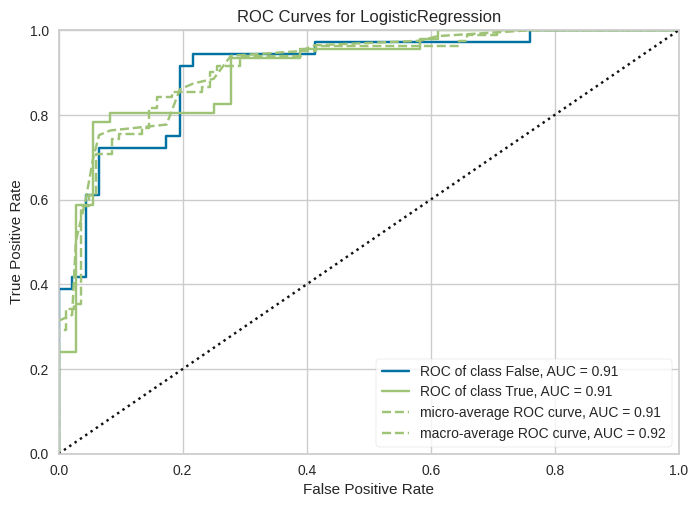

In [71]:
plot_model(tuned_lr, plot = 'auc')

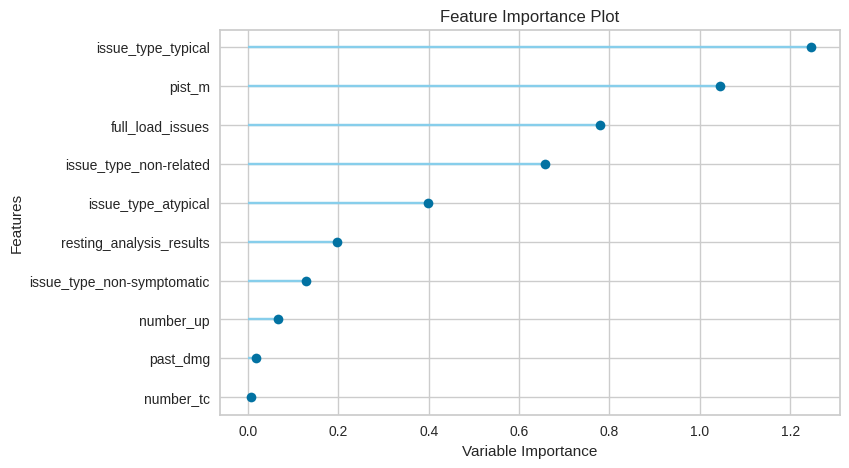

In [72]:
plot_model(tuned_lr, plot='feature')

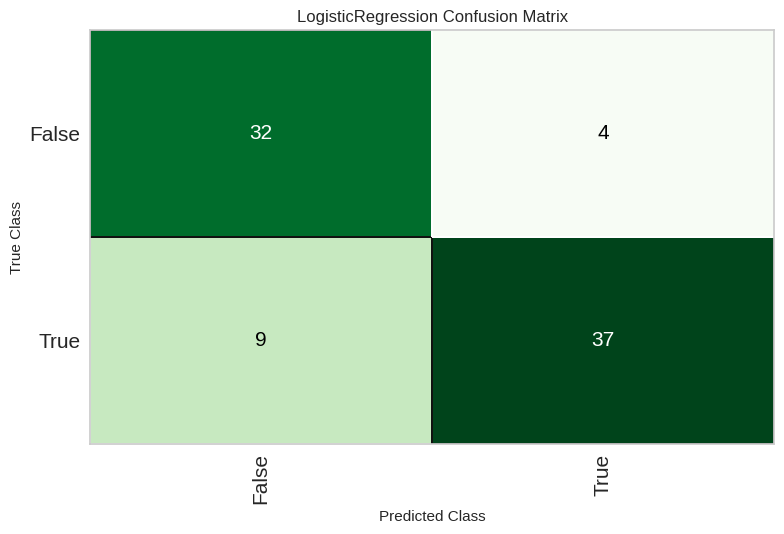

In [73]:
plot_model(tuned_lr, plot = 'confusion_matrix')

In [74]:
save_model(final_lr,'Final LR Model engine')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['oph', 'bmep', 'ng_imp',
                                              'resting_analysis_results',
                                              'rpm_max', 'number_up',
                                              'number_tc'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                